# LSTM for Regression Using the Window Method

### We can also phrase the problem so that multiple, recent time steps can be used to make the prediction for the next time step. 

This is called a window, and the size of the window is parameter that can be tuned for each problem. 

For example, given the current time (t) we want to predict the value at the next time in the sequence(t+1), we can use the current time (t), as well as the two prior time (t-1 and t-2) as input variables. 

When phrased as a regression problem, the input variables are t-2, t-1, t and the output variable is t+1. 

The create_Dataset() allows us to create this formulation of the time series problem by using the look_back argument as 3. 

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [3]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
X, Y = create_dataset(dataset, look_back=3)

for i in range(5):
    print(X[i], Y[i])

[ 112.  118.  132.] 129.0
[ 118.  132.  129.] 121.0
[ 132.  129.  121.] 135.0
[ 129.  121.  135.] 148.0
[ 121.  135.  148.] 148.0


To understand the format of X and dataset

In [9]:
print(x.shape)
print(dataset[1:3])
print(dataset[1:3,0])

[[ 118.]
 [ 132.]]
[ 118.  132.]


#### We do the normal data prepration

In [11]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#### LSTM network model is defined as same as normal regression
#### 4 neurons and 1 output, input_dim is 3, defined by look_back

In [13]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_2 (LSTM)                    (None, 4)             128         lstm_input_2[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             5           lstm_2[0][0]                     
Total params: 133
Trainable params: 133
Non-trainable params: 0
____________________________________________________________________________________________________


Train.....

In [14]:
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
0s - loss: 0.0347
Epoch 2/100
0s - loss: 0.0127
Epoch 3/100
0s - loss: 0.0095
Epoch 4/100
0s - loss: 0.0080
Epoch 5/100
0s - loss: 0.0067
Epoch 6/100
0s - loss: 0.0055
Epoch 7/100
0s - loss: 0.0045
Epoch 8/100
0s - loss: 0.0038
Epoch 9/100
0s - loss: 0.0032
Epoch 10/100
0s - loss: 0.0029
Epoch 11/100
0s - loss: 0.0027
Epoch 12/100
0s - loss: 0.0026
Epoch 13/100
0s - loss: 0.0024
Epoch 14/100
0s - loss: 0.0024
Epoch 15/100
0s - loss: 0.0024
Epoch 16/100
0s - loss: 0.0024
Epoch 17/100
0s - loss: 0.0023
Epoch 18/100
0s - loss: 0.0023
Epoch 19/100
0s - loss: 0.0023
Epoch 20/100
0s - loss: 0.0024
Epoch 21/100
0s - loss: 0.0023
Epoch 22/100
0s - loss: 0.0023
Epoch 23/100
0s - loss: 0.0024
Epoch 24/100
0s - loss: 0.0023
Epoch 25/100
0s - loss: 0.0023
Epoch 26/100
0s - loss: 0.0023
Epoch 27/100
0s - loss: 0.0023
Epoch 28/100
0s - loss: 0.0023
Epoch 29/100
0s - loss: 0.0023
Epoch 30/100
0s - loss: 0.0023
Epoch 31/100
0s - loss: 0.0022
Epoch 32/100
0s - loss: 0.0023
Epoch 33/100
0s -

In [15]:
# make predicitions 

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.74 RMSE
Test Score: 61.13 RMSE


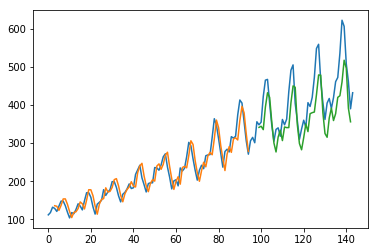

In [16]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()